### 혼합 모형 (Mixture Distribtuion)

- 아래는 한 쇼핑센터에서 쇼핑을 마친 1,000명의 쇼핑 시간에 대한 자료의 히스토그램이다. 자료의 평균, 표준편차를 추정해 그린 정규분포와 비교해보면 잘 맞지 않는것을 확인할 수 있다.

In [1]:
from IPython.display import Image

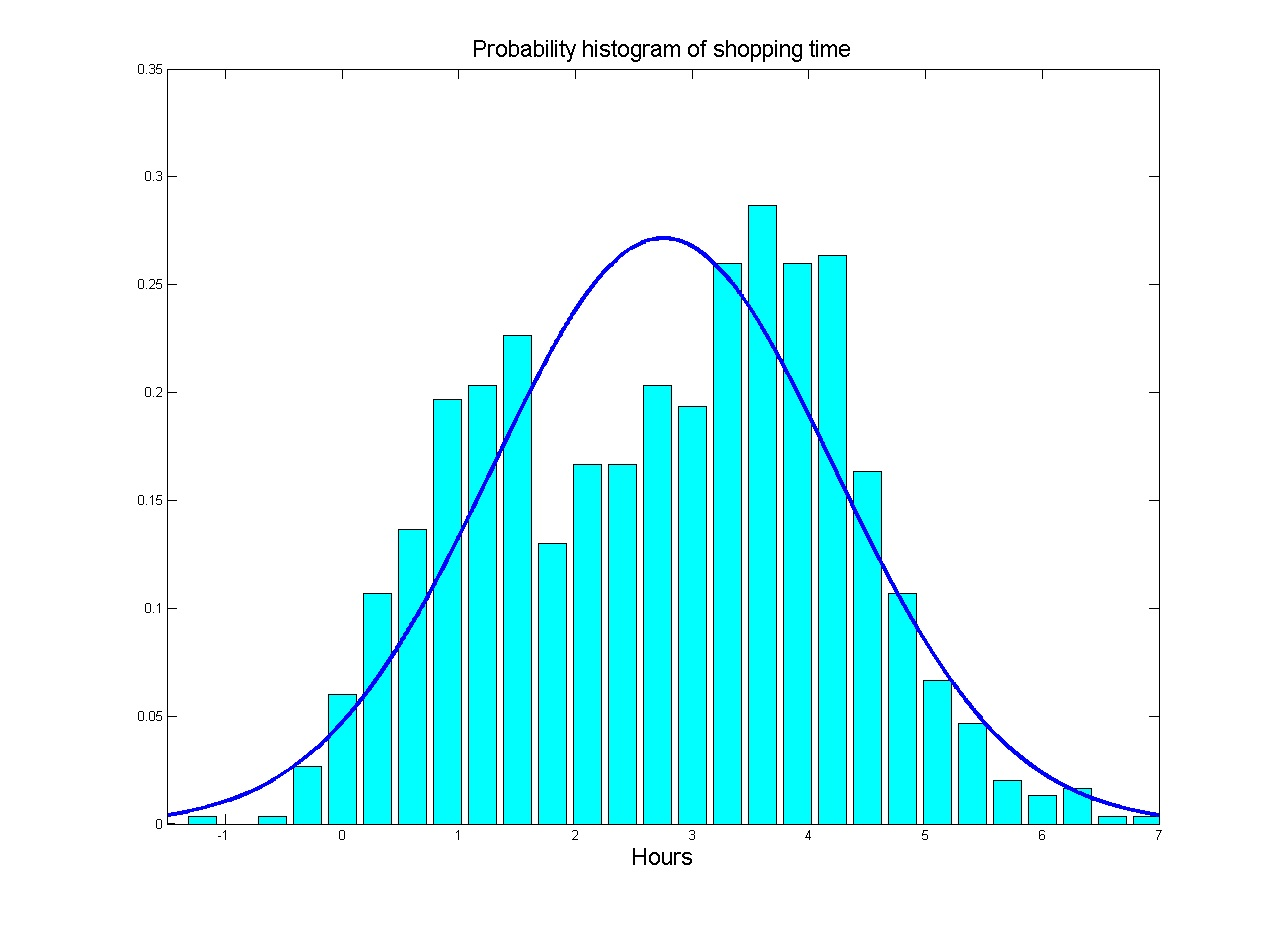

In [2]:
Image("C:/Users/com/Desktop/ML/Lecture_09/Lecture_09_figure_01.jpg", width = 600, height = 300)

- 이를 두개의 정규분포가 혼합되어 있는 형태로 가정해 적용시켜보면 잘 맞는 것을 확인할 수 있다.

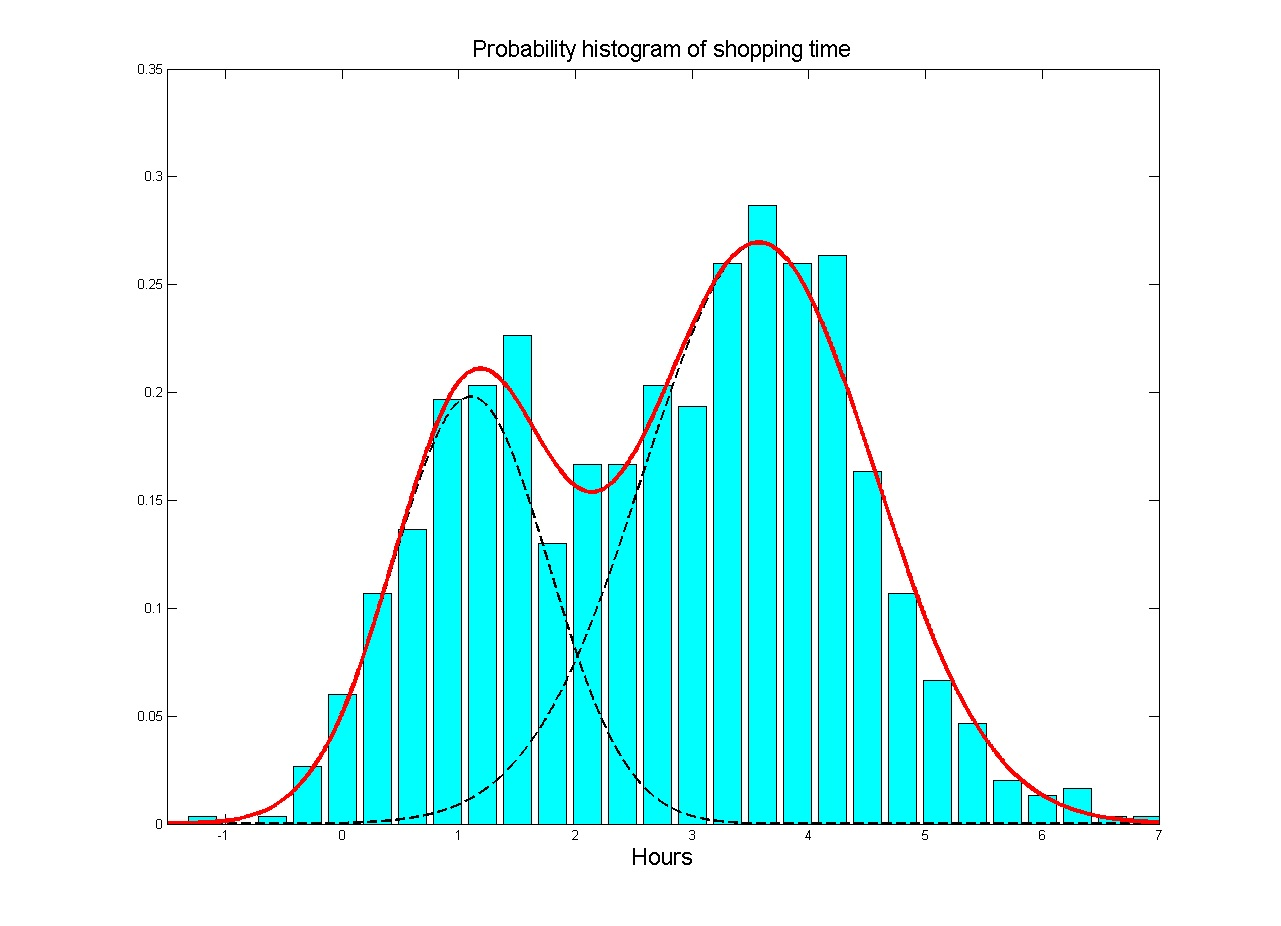

In [3]:
Image("C:/Users/com/Desktop/ML/Lecture_09/Lecture_09_figure_02.jpg", width = 600, height = 300)

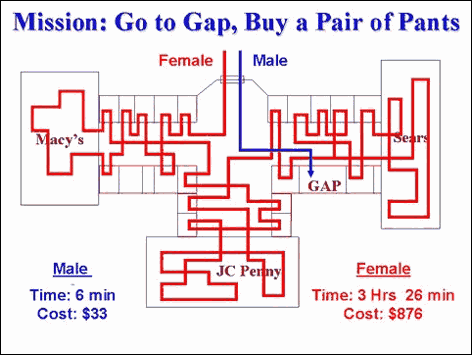

In [4]:
Image("C:/Users/com/Desktop/ML/Lecture_09/Lecture_09_figure_03.jpg", width = 600, height = 300) # Tom Peters (2006)

- 우리가 얻은 자료만으로는 확인할 수 없지만 분명한 것은 쇼핑 시간 자료에는 성향이 다른 두 집단이 섞여 있을 것이라 짐작할 수 있다. 해당 차이가 남녀의 차이에서 왔다고 가정한 후 어떻게 하면 성별 정보를 얻지 않은 자료에서 두 집단을 잘 구별해 낼 수 있을 지 생각해보자.

#### Probability structure

- $X_{i}$ : The time spent by $i$-th shopper

- $Z_{i} = 
\begin{cases}
1&\text{for male}\\
0&\text{for female}\\
\end{cases}$

- Probability densities <br><br>
 $f_{1}(x)$: pdf of times for male shopper, i.e. $f_{1}(x) = f(x|z = 1)$ <br>
 $f_{0}(x)$: pdf of times for female shopper, i.e. $f_{0}(x) = f(x|z = 0)$ <br>
 $Z_{i} \sim Bernoulli(p)$

- Joint density of $(X, Z)$: <br><br>
 $f(x, z=1) = f(x|z = 1)p(z = 1) = pf_{1}(x)$ <br>
 $f(x, z=0) = f(x|z = 0)p(z = 0) = (1-p)f_{0}(x)$ <br><br>
 $\Rightarrow f(x, z) = \left[pf_{1}(x)\right]^{z}\left[(1-p)f_{0}(x)\right]^{1-z}$

- Marginal density of X: <br><br>
$
\begin{align}
f(x) = \sum_{z = 0}^{1} f(x, z) = f(x, z = 0) + f(x, z = 1) = pf_{1}(x) + (1-p)f_{0}(x)
\end{align}
$

- Conditional density of Z given X: <br><br>
$
\begin{align} 
f(z|x) & = \frac{f(x, z)}{f(x)} \\
& = \frac{\left[pf_{1}(x)\right]^{z}\left[(1-p)f_{0}(x)\right]^{1-z}}{pf_{1}(x) + (1-p)f_{0}(x)} \\
& = \frac{\left[pf_{1}(x)\right]^{z}\left[(1-p)f_{0}(x)\right]^{1-z}}{\left[pf_{1}(x) + (1-p)f_{0}(x)\right]^{z}\left[pf_{1}(x) + (1-p)f_{0}(x)\right]^{1-z}} \\
& = \left(\frac{pf_{1}(x)}{pf_{1}(x) + (1-p)f_{0}(x)}\right)^{z}\left(\frac{(1-p)f_{0}(x)}{pf_{1}(x) + (1-p)f_{0}(x)}\right)^{1-z}
\end{align}
$

- In generall, $k$-component mixture density: <br><br>
$
\begin{align}
f(x; \theta) = \sum_{j = 1}^{k}p_{j}f(x; \theta_{j}), where \sum_{j = 1}^{k}p_{j} = 1, p_{j} \ge 0, for j = 1, \ldots, k
\end{align}
$

- Example: Two-component normal mixture density <br><br>
$
\begin{align}
f(x; p_{1}, p_{2}, \mu_{1}, \mu_{2}, \sigma_{1}, \sigma_{2}) = \frac{p_{1}}{\sqrt{2\pi\sigma_{1}^2}}exp\left(-\frac{\left(x-\mu_{1}\right)^2}{2\sigma_{1}^2}\right) + \frac{p_{2}}{\sqrt{2\pi\sigma_{2}^2}}exp\left(-\frac{\left(x-\mu_{2}\right)^2}{2\sigma_{2}^2}\right) \\
\end{align}
$
<br>
$
\begin{align}
E(X) = \mu^{*} = \sum_{j = 1}^{2}p_{j}\mu_{j}
\end{align}
$
<br>
$
\begin{align}
Var(X) = \sum_{j = 1}^{2}p_{j}\sigma_{j}^2 + \sum_{j = 1}^{2}p_{j}\left(\mu_{j} - \mu^{*}\right)^2
\end{align}
$

- 혼합모형의 모수는 EM algorithm을 통해 추정할 수 있다. 일반적으로 EM algorithm을 다루면 복잡하니 우리는 앞선 쇼핑 데이터 예제를 통해 과정을 살펴보자.

#### EM(Expectation-Maximization) Algorithm

- 앞서 로지스틱 회귀분석을 학습할때 한번 언급되었던 최대 가능도 추정법(Maximum liklihood estimation, MLE)을 통해 모수를 추정하고자 한다. 모수를 추정하기 위해 목적함수가 필요한데 여기서는 가능도 함수(likelihood function)를 사용한다. (자료 수는 n으로 표현하며, $\theta$는 $p$와 두 분포를 구성하는 모든 모수를 포함한다.)

$
\begin{align}
l(\theta) = \sum_{i = 1}^{n}\left[Z_{i}\cdot\left(log p + log f_{1}(x_i)\right) + (1-Z_{i})\cdot\left( log(1-p) + log f_{0}(x_{i})\right)\right]
\end{align}
$

- 원래 모수를 추정하는 목적함수에서는 모수를 제외한 모든 값들이 주어져야 하는데 현재 우리는 $Z_{i}$값들을 모르는 문제가 있다. 이를 E-step을 통해 해결한다. 이때, K-means에서와 같이 모수에 랜덤하게 초기값을 주게된다.

- E-step: <br>
$
\begin{align}
\hat{Z_{i}} = E(Z_{i}|X_{i},\theta^{(t)}) = P(Z_{i} = 1|X_{i},\theta^{(t)}) = \frac{p^{(t)}f_{1}(x_{i}; \theta_{1}^{(t)})}{p^{(t)}f_{1}(x; \theta_{1}^{(t)}) + (1-p^{(t)})f_{0}(x_{i}; \theta_{0}^{(t)})}
\end{align}
$

- E-step을 통해 가능도함수에 기댓값을 취하면 가능도 함수에서 Z의 결측을 해결할 수 있게 된다. E-step을 통해 구해진 목적함수는 아래와 같다. 

$
\begin{align}
Q\left(\theta|\theta^{(t)}\right) = E\left(l(\theta)|\theta^{(t)}\right) = \sum_{i = 1}^{n}\left[\hat{Z_{i}}\cdot\left(log p^{(t)} + log f_{1}(x_i; \theta_{1}^{(t)})\right) + (1-\hat{Z_{i}})\left( log(1-p^{(t)}) + log f_{0}(x_{i}; \theta_{0}^{(t)})\right)\right]
\end{align}
$

- 최대 가능도라 함은 말 그대로 가능도중에 가장 큰 지점을 찾는 것이다. 즉, 모수가 나올 가능성이 가장 큰 지점이며 우리는 미분을 통해 가능도함수가 최대가 되는 지점을 찾을 수 있다.

- M-step: <br><br>
$
\begin{align}
\frac{\partial Q}{\partial p} = \frac{1}{p}\sum_{i = 1}^{n}\hat{Z_{i}} - \frac{1}{1-p}\sum_{i = 1}^{n}\left(1 - \hat{Z_{i}}\right) = 0 \\
\end{align}
$
<br>
$
\begin{align}
\Rightarrow p^{(t+1)} = \frac{\sum_{i = 1}^{n}\hat{Z_{i}}}{n}
\end{align}
$

- 위와 같이 E-step과 M-step을 모수가 수렴할때까지 반복해 업데이트하여 모수를 추정할 수 있다. 여기서는 $p$값에 대한 M-step 과정만 나타내었지만 각 집단의 분포가 정규분포 등으로 가정된다면 각 분포의 모수들 역시 구할 수 있다.

- Example: Two-component normal mixture density (revisited.)<br><br>
$
\begin{align}
Q[\theta|\theta^{(t)}] = \sum_{i = 1}^{n}\hat{z}_{i}\cdot(\log p^{(t)}+\log \phi(x_i; \mu_{1}^{(t)}, \sigma_{1}^{(t)})) + \sum_{i=1}^{n}\left(1 - \hat{z}_{i}\right)\cdot(\log(1 - p^{(t)})+\log \phi(x_i; \mu_{2}^{(t)}, \sigma_{2}^{(t)}))
\end{align}
$
<br>
$
\begin{align}
p^{(t+1)} = \frac{\sum_{i = 1}^{n}\hat{Z_{i}}}{n}
\end{align}
$
<br>
$
\begin{align}
\hat{\mu_1}^{(t+1)} = \frac{\sum_{i = 1}^{n}\hat{z_{i}}x_{i}}{\sum_{i = 1}^{n}\hat{z_{i}}}
\end{align}
$
<br>
$
\begin{align}
\hat{\mu_2}^{(t+1)} = \frac{\sum_{i = 1}^{n}\left(1 - \hat{z}_{i}\right)x_{i}}{\sum_{i = 1}^{n}\left(1 - \hat{z}_{i}\right)}
\end{align}
$
<br>
$
\begin{align}
\hat{\sigma_1}^{(t+1)} = \frac{\sum_{i = 1}^{n}\hat{z_{i}}(x_{i}-\mu_1^{(t)})^2}{\sum_{i = 1}^{n}\hat{z_{i}}}
\end{align}
$
<br>
$
\begin{align}
\hat{\sigma_2}^{(t+1)} = \frac{\sum_{i = 1}^{n}\left(1 - \hat{z}_{i}\right)(x_{i}-\mu_2^{(t)})^2}{\sum_{i = 1}^{n}\left(1 - \hat{z}_{i}\right)}
\end{align}
$